# Crime Rate and Housing Price analysis in the United States

**Team Name: Watch Block**

**Sarah Ramirez - 862142920**

**Srijan Pagadala - 862212888**

**Joseph Mangapit - 862175676**

# Phase 2 - Data Preparation



## Initial Data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%pip install zipcodes #zipcodes package required for mapping zipcodes -> city

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 27.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import zipcodes
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim
import seaborn as sns
import plotly.express as px
import statistics
from geopy.geocoders import Nominatim
import plotly.graph_objects as go
from scipy.stats import pearsonr
from plotly.subplots import make_subplots

Dataset obtained from: https://www.kaggle.com/datasets/mrayushagrawal/us-crime-dataset



In [ ]:
file_path = "/content/drive/MyDrive/CS252AData"

df_crime = pd.read_csv(file_path + "/US_Crime_DataSet.csv")
df_crime


<ipython-input-5-c72215e2d9c8>:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crime = pd.read_csv(file_path + "/US_Crime_DataSet.csv")


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


Dataset obtained from: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

In [ ]:
df_housing = pd.read_csv(file_path + "/realtor-data.csv")
df_housing

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [ ]:
df_housing.drop(columns=['brokered_by', 'acre_lot', 'street', 'house_size', 'status'], inplace=True) #We don't need these columns for our analysis

In [ ]:
df_crime.drop(columns=['Agency Name', 'Agency Type', 'Victim Count', 'Perpetrator Count'], inplace=True)

In [ ]:
df_housing.rename(columns = {'zip_code' : 'Zip Code','state': 'State', 'city': 'City', 'prev_sold_date' : 'Date'}, inplace = True) #cleaning up attribute names
df_housing

,price,bed,bath,City,State,Zip Code,Date
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,601.0,NaN
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,601.0,NaN
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,795.0,NaN
3,145000.0,4.0,2.0,Ponce,Puerto Rico,731.0,NaN
4,65000.0,6.0,2.0,Mayaguez,Puerto Rico,680.0,NaN
...,...,...,...,...,...,...,...
2226377,359900.0,4.0,2.0,Richland,Washington,99354.0,2022-03-25
2226378,350000.0,3.0,2.0,Richland,Washington,99354.0,2022-03-25
2226379,440000.0,6.0,3.0,Richland,Washington,99354.0,2022-03-24
2226380,179900.0,2.0,1.0,Richland,Washington,99354.0,2022-03-24


## Fixing State, Month, and City attributes

In order to make the data compatible with the map visualizations we will do in a later phase, we transformed each state from its full name to the official state abbreviation in both datasets.

In [ ]:
#We got the state -> abbreviation dictionary from here: https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

df_housing['State'] = df_housing['State'].map(us_state_to_abbrev)
df_crime['State'] = df_crime['State'].map(us_state_to_abbrev)

The crime dataset has "Year" and "Month" for every row whereas the housing dataset has a "Date" feature that contains the year and month in YYYY-MM-DD format. In order to match the format across both datasets, we extracted the year and month from the date column in the housing dataset. For the year, we just made a new column with the exact extracted value. For the month, we had to change it from a numerical format to a string/word format (i.e. 01 gets transformed to January) in order to match the crimes dataset.

In [ ]:
# Mapping of numerical months and their respective text versions
month_to_number = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12',
    'Unknown': '00'
}

df_housing['Year'] = df_housing['Date'].str.slice(0, 4) #extract "YYYY" from date as new column
df_housing['Month'] = df_housing['Date'].str.slice(5, 7) #extract "MM" from date as new column

df_housing.drop(columns=['Date'], inplace=True) #drop date column, we no longer need it

df_housing['Year'].fillna('0000', inplace=True) #fill in missing year values with "0000" as a dummy year
df_housing['Month'].fillna('00', inplace=True) #fill in missing month values with "00" as a dummy month

month_to_number = dict(map(reversed, month_to_number.items())) #turn dict from text->number mapping to number->text mapping
df_housing['Month'] = df_housing['Month'].map(month_to_number) #map each "MM" to its corresponding text version

<ipython-input-11-1076fbffd109>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_housing['Year'].fillna('0000', inplace=True) #fill in missing year values with "0000" as a dummy year
<ipython-input-11-1076fbffd109>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Here we filled in missing values for zipcode in the housing data with a dummy zip code of "00000.0" to match the other data. We then noticed some zipcodes were not five digits in our data because the leading zeroes were missing (i.e. zipcode "900" was represented as "900.0" in our data). We used zfill in order to standardize each of these by adding leading zeroes to make sure each zipcode followed the same format with the same amount of digits

In [ ]:
df_housing['Zip Code'].fillna('00000.0', inplace=True)
df_housing['Zip Code'] = df_housing['Zip Code'].astype(str).str.zfill(7)

<ipython-input-12-141fb73bd709>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_housing['Zip Code'].fillna('00000.0', inplace=True)
<ipython-input-12-141fb73bd709>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00000.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_housing['Zip Code'].fillna('00000.0', inplace=True)


We noticed that the rows missing a value for the "State" column were all from the Virgin Islands. Our crimes dataset does not have data from the Virgin Islands, so we dropped all rows which have a missing value for the State column (the Virgin Islands rows).

In [ ]:
df_housing.dropna(subset=['State'], inplace=True) # drop all rows which are missing values for the State column

In our housing dataset, we notice that there are no rows that are missing a value for Zip Code, but some are missing City values. In order to clean the City column, we used the zipcodes package in order to map each zipcode to their respective city for the rows that have a missing zipcode.

In [ ]:
# filled in city based on zipcodes
def zco(x):
    result = zipcodes.filter_by(zip_code=str(x))
    if result:
        return result[0].get('city', 'None')
    return 'None'
df_housing.loc[df_housing['City'].isna(), 'City'] = df_housing.loc[df_housing['City'].isna(), 'Zip Code'].apply(zco)

## Mean & Median Imputation

Now, the only columns with missing values left are price, bed, and bath. For these, we used mean/median imputation by group to fill in the missing values.

For price, we first grouped by Zip Code and then performed mean imputation. This ensured that each row with a missing price would be filled in with the average price for that Zip Code. Grouping by Zip Code allows for the calculated mean to be more accurate for that row's specific area.


For bed & bath, we decided to use median imputation instead of mean since we did not want to get a decimal value. Similar to price, grouped by Zip Code and calculated the median to impute based on the Zip Code of the record. However, this led to values still missing since some Zip Codes did not have any data for price at all (i.e. there would be one row corresponding to that zip code which would have a missing bed and bath value so a median could not be calculated). There was still ~4000 rows with missing bed and bath values.

In order to combat that, we did another group by and median imputation, but this time, we grouped on the City attribute. We then did another later of median imputation by grouping on the State attribute.

After all the imputations, each row now has a bed and a bath value.


In [ ]:
df_housing = df_housing[df_housing['bed'] <= 24]

In [ ]:
df_housing = df_housing[df_housing['bath'] <= 24]

In [ ]:
print("Mean price: ", df_housing['price'].mean())
print("Median price: ", df_housing['price'].median())
print("Mode price: ", statistics.mode(df_housing['price']))

Mean price:  580746.6753499507
Median price:  375000.0
Mode price:  350000.0


In [ ]:
# mean imputation for price based on zipcode
# median imputation for bed and bath based on zipcode
df_housing['price'] = df_housing.groupby("Zip Code")['price'].transform(lambda x: x.fillna(x.mean()))
df_housing['bed'] = df_housing.groupby("Zip Code")['bed'].transform(lambda x: x.fillna(x.median()))
df_housing['bath'] = df_housing.groupby("Zip Code")['bath'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# median imputation for bed and bath based on City
df_housing['bed'] = df_housing.groupby("City")['bed'].transform(lambda x: x.fillna(x.median()))
df_housing['bath'] = df_housing.groupby("City")['bath'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# median imputation for bed and bath based on State
df_housing['bed'] = df_housing.groupby("State")['bed'].transform(lambda x: x.fillna(x.median()))
df_housing['bath'] = df_housing.groupby("State")['bath'].transform(lambda x: x.fillna(x.median()))

(0.0, 1200000.0)

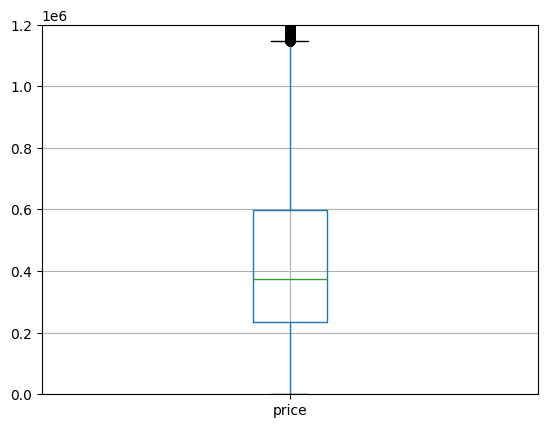

In [ ]:
#df_housing['bed'].hist(figsize=(5, 5),bins=10, range=(0,10))

df_housing.boxplot('price')
plt.ylim(0,1200000)

<Axes: >

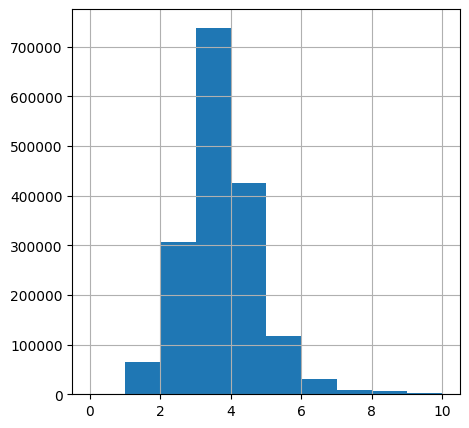

In [ ]:
df_housing['bed'].hist(figsize=(5, 5),bins=10, range=(0,10))

<Axes: >

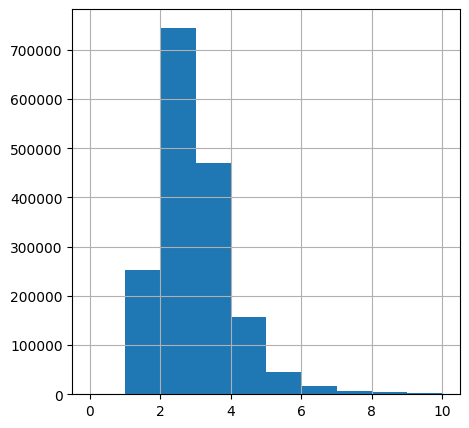

In [ ]:
df_housing['bath'].hist(figsize=(5, 5),bins=10, range=(0,10))

In [ ]:
print("Mean price: ", df_housing['price'].mean())
print("Median price: ", df_housing['price'].median())
print("Mode price: ", statistics.mode(df_housing['price']))

Mean price:  580631.2338175722
Median price:  375000.0
Mode price:  350000.0


After performing the mean imputation on price earlier, there were still ~10 rows missing a price. This is due to the same reason as above, as there were rows who had no values for price for Zip Code.

Instead of performing multiple layers of imputation with broader and broader groups as we did above for bed & bath, we decided to just drop the remaining rows that were missing price. We did this because price is a very important part of our analysis, and we didn't want to calculated means on larger areas such as City/State because we want our price values to be as accurate as possible. Since there were also only a few rows with missing price values after the initial mean imputation, we just dropped them.

In [ ]:
# Very few housing prices left ~10 and we do not want to give inaccurate prices
df_housing.dropna(subset=['price'], inplace=True)

## Filling in Missing States

Our crime data set has one column with missing values left. We notice the State column has missing values. To fix this, there is another column called "Agency Code" where the first two characters of the value for that column actually refer to the state abbreviation (i.e. the row with Agency Code AK00101 is in Alaska). So for the rows which were missing State values, we extracted the first two characters of the Agency Code and used that as the value for that record's State value.

In [ ]:
df_crime.loc[df_crime['State'].isna(), 'State'] = df_crime.loc[df_crime['State'].isna(), 'Agency Code'].str.slice(0, 2)

Here we drop "Agency Code" from the Crime dataset since we do not need it anymore.

In [ ]:
df_crime.drop(columns=['Agency Code'], inplace=True)

Final preview of dataframes after cleaning & transformations:

In [ ]:
df_housing.tail(10)

,price,bed,bath,City,State,Zip Code,Year,Month
2226372,425000.0,3.0,3.0,Richland,WA,99354.0,2022,February
2226373,305000.0,4.0,2.0,Richland,WA,99354.0,2022,February
2226374,310000.0,3.0,1.0,Richland,WA,99354.0,2022,February
2226375,385000.0,4.0,2.0,Richland,WA,99354.0,2022,March
2226376,339900.0,4.0,2.0,Richland,WA,99354.0,2022,March
2226377,359900.0,4.0,2.0,Richland,WA,99354.0,2022,March
2226378,350000.0,3.0,2.0,Richland,WA,99354.0,2022,March
2226379,440000.0,6.0,3.0,Richland,WA,99354.0,2022,March
2226380,179900.0,2.0,1.0,Richland,WA,99354.0,2022,March
2226381,580000.0,5.0,3.0,Richland,WA,99354.0,2022,March


In [ ]:
df_crime.tail(10)

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
638444,638445,Laramie,WY,2014,December,1,Murder or Manslaughter,Yes,Male,48,White,Hispanic,Male,35,White,Unknown,Acquaintance,Suffocation,FBI
638445,638446,Lincoln,WY,2014,December,1,Murder or Manslaughter,Yes,Male,22,White,Unknown,Male,26,White,Unknown,Acquaintance,Handgun,FBI
638446,638447,Natrona,WY,2014,September,1,Murder or Manslaughter,Yes,Female,76,White,Not Hispanic,Male,48,White,Not Hispanic,Mother,Handgun,FBI
638447,638448,Natrona,WY,2014,June,1,Murder or Manslaughter,Yes,Female,21,Black,Not Hispanic,Male,22,White,Unknown,Girlfriend,Handgun,FBI
638448,638449,Natrona,WY,2014,August,1,Murder or Manslaughter,Yes,Male,29,Native American/Alaska Native,Unknown,Male,67,Black,Unknown,Friend,Firearm,FBI
638449,638450,Park,WY,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,FBI
638450,638451,Sheridan,WY,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,FBI
638451,638452,Sheridan,WY,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,FBI
638452,638453,Sublette,WY,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,FBI
638453,638454,Sweetwater,WY,2014,September,1,Murder or Manslaughter,Yes,Female,0,White,Not Hispanic,Female,24,White,Not Hispanic,Daughter,Blunt Object,FBI


# Phase 3 - Data Visualization, Analysis

## Crime Analysis
In this section, we analyze features from the crime dataset.

We group the crime dataset by state and count the number of rows in each group. This results in the number of crimes recorded per state. We then visualize this data using a bar plot, where the x axis is the state and the y axis is the frequency of crimes relative to other states.

In [ ]:
crimePerState = df_crime.groupby('State').size().reset_index(name='Count')
freq = crimePerState['Count'].sum()
crimePerState['Freq'] = crimePerState['Count'].apply(lambda x: x/freq)
crimePerState = crimePerState.sort_values(by='Freq', ascending=False)
fig = px.bar(crimePerState, x='State', y='Freq', orientation='v', title='Crime Frequency by State', labels={'Freq': 'Frequency', 'State': 'State'})

fig.show()

From the bar plot above, we can see that the top four states with the most crime are California, Texas, New York, and Florida. One important thing to note is that these 4 states are the most populated states in the U.S. and therefore will account for more crimes than other states.

\\
Next we will analyze the number of crimes per year from the years 1980-2014. We do so by now grouping the rows by the "Year" attribute and counting the number of rows in each group. We plot this data with a line graph where the x axis is the year and the y axis is the number of crimes for that year.

In [ ]:
crimePerYear = df_crime.groupby('Year').size().reset_index(name='Count')
fig = px.line(crimePerYear, x='Year', y='Count', orientation='v', title='Crime Counts by Year (1980-2014)', labels={'Count': 'Count', 'Year': 'Year'})

fig.show()

The global peak of crime in our graph is during the year 1993. The global minimum is 2014. Over the course of the years after the peak in 1993, there has been a general downward trend of crimes per year.

\\
This next section focuses on the proportion of male and female perpetrators for crimes committed. We visualize this information with a pie chart that shows the ratio of crimes committed by men and crimes committed by women.

In [ ]:
crimePerGender = df_crime.groupby('Perpetrator Sex').size().reset_index(name='Count')
crimePerGender = crimePerGender.sort_values(by='Count', ascending=False)
crimePerGender = crimePerGender[crimePerGender['Perpetrator Sex'] != 'Unknown']

total_count = crimePerGender['Count'].sum()
crimePerGender['Freq'] = crimePerGender['Count'].apply(lambda x: x/total_count)
crimePerGender.head()
fig = px.pie(crimePerGender, values='Freq', names='Perpetrator Sex', title='Crimes committed per Sex', color='Perpetrator Sex', color_discrete_map={'Male':'#4169E1', 'Female':'#C21E56'}, opacity=.8)
fig.show()


Male perpetrators made up ~90% of the crimes committed in our dataset. One thing to note is that there were rows where the perpetrator's gender was unknown, which we discarded for our analysis.

\\
Next, we wanted to analyze the frequency of each gender on gender crime. Since we are only interested in the data where the perpetrator and victim sex are known, we discarded the rows where either of these attribute values were unknown. We visualized this through a heatmap of the victim v.s. perpetrator sex.

In [ ]:
perp_victim = df_crime.groupby(['Perpetrator Sex', 'Victim Sex']).size().reset_index(name='Count')
perp_victim = perp_victim[perp_victim['Perpetrator Sex'] != 'Unknown']
perp_victim = perp_victim[perp_victim['Victim Sex'] != 'Unknown']

perp_victim

fig = px.imshow(perp_victim.pivot(index='Perpetrator Sex', columns='Victim Sex', values='Count'),
                labels=dict(x="Victim Sex", y="Perpetrator Sex", color="Count"), color_continuous_scale='oryel', title='Perpetrator Sex vs Victim Sex')
fig.show()

The most common crimes were male on male, whereas the least common was female on female.

\\
We then analyzed the frequency of crimes in each month of each year from 1980-2014. We displayed this analysis with a heatmap, where the x axis represents the year, the y axis represents the month, and each cell shows the number of crimes committed in that month during that year.

In [ ]:
yearMonth = df_crime.groupby(['Year', 'Month']).size().reset_index(name='Count')

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig = px.imshow(yearMonth.pivot(index='Month', columns='Year', values='Count'),
                 labels=dict(x="Year", y="Month", color="Count"), color_continuous_scale='sunset', title='Crime count by month and year')
fig.update_layout(yaxis={'categoryorder': 'array', 'categoryarray': new_order})

fig.show()

The month that has the lowest crime count throughout the years is February. This is possibly due to the fact that there are less days in February (so the crime counts are inherently lower) or because Valentine's Day is during this month and it is the month of love. The middle months seem to generally have more crimes committed.

## Housing Analysis
In this section, we analyze features from the housing dataset.

\\
The first analysis we performed on the housing dataset is the number of houses sold per year from the years of 1980-2014. We visualized this with a line chart.

In [ ]:
df_housing
housePerYear = df_housing.groupby('Year').size().reset_index(name='Count')
housePerYear = housePerYear[housePerYear['Year'] >= '1980']
housePerYear = housePerYear[housePerYear['Year'] <= '2014']

fig = px.line(housePerYear, x='Year', y='Count', orientation='v', title='Houses Sold per Year', labels={'Count': 'Count', 'Year': 'Year'})

fig.show()

The general trend of the graph shows that the number of houses being sold have been increasing since 1980. This is potentially because of more houses being built and a bigger demand for houses as the population grows. We observe a dip in the number of houses sold around the 2007-2009 time period. We believe this corresponds to the housing market crash of 2008, which ultimately led to lessened demand of houses.

\\
The next analysis we performed was the number of houses sold per month. We showed this with a bar chart, where the x axis is the month and the y axis represents the total number of houses sold in the month.

In [ ]:
housePerYear = df_housing.groupby('Month').size().reset_index(name='Count')
housePerYear = housePerYear[housePerYear['Month'] != 'Unknown']

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig = px.bar(housePerYear, x='Month', y='Count', orientation='v', title='Houses sold per Month', labels={'Count': 'Count', 'Month': 'Month'})
fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': new_order})

fig.show()


Our graph shows a peak of houses sold in the month of April, with a dip around the middle of the year. The graph trends upward again in the later months of the year. We believe this is because people tend to purchase homes toward the beginning/end of the year.

\\
We then wanted to analyze the average home price per state. We aggregated our data by state and calculated the mean home price for each state. We visualized these results with a bar chart.

In [ ]:
priceBed = df_housing[['price', 'State']]
priceBed = priceBed.groupby('State')['price'].mean().reset_index()
priceBed = priceBed.sort_values(by='price', ascending=False)
fig = px.bar(priceBed, y='price', x='State', orientation='v', title='Average Price by State', labels={'price': 'Average Price', 'State': 'State'},text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()


The state with the highest average home price is Hawaii, with California and New York trailing behind. The state with the smallest average home price was Ohio. This makes sense because the cost of living in Hawaii, California, and New York are the highest in the United States.

## Housing and Crime analysis
In this section, we analyzed the merged version of the two datasets.

\\
First, we grouped each dataframe by state and city in order to find the average home price & total crime count of each individual city. We then joined these two dataframes on the state and city attributes, which gives us a final merged dataset that has each city, the state it resides in, the number of crimes committed in that city, and the average home price in that city.

In [ ]:
house = df_housing[['price', 'State','City', 'Year', 'Month']]
crime = df_crime[['State','City', 'Year', 'Month']]

house = house.groupby(['State', 'City']).agg({'price': 'mean'}).reset_index()

crime = crime.groupby(['State', 'City']).size().reset_index(name='Count')
crime

df_merged = pd.merge(crime, house, on=['State', 'City'])
df_merged

,State,City,Count,price
0,AK,Anchorage,676,4.753182e+05
1,AK,Bethel,23,5.754444e+05
2,AK,Dillingham,11,2.250000e+05
3,AK,Haines,1,7.051000e+05
4,AK,Juneau,674,4.804891e+05
...,...,...,...,...
986,WV,Wyoming,49,6.250000e+04
987,WY,Big Horn,12,2.990000e+05
988,WY,Laramie,89,5.265041e+05
989,WY,Natrona,97,5.750000e+06


In order to interface our data with Plotly so we could map our results, we had to convert each city/state into longitude and latitude values. We used an API that fetches the longitude/latitude given a city and state. We then used that to convert the (city, state) pairs in our dataframe to geographic coordinates that we stored as new attributes in our dataframe.

In [ ]:
geolocator = Nominatim(user_agent="geoapi")

def get_lat_lon(row):
    location = geolocator.geocode(f"{row['City']}, {row['State']}")
    if location:
        return pd.Series({'lat': location.latitude, 'lon': location.longitude})
    return pd.Series({'lat': None, 'lon': None})

df_merged[['lat', 'lon']] = df_merged.apply(get_lat_lon, axis=1)


In [ ]:
df_merged

,State,City,Count,price,lat,lon
0,AK,Anchorage,676,4.753182e+05,61.216313,-149.894852
1,AK,Bethel,23,5.754444e+05,60.792222,-161.755833
2,AK,Dillingham,11,2.250000e+05,59.039722,-158.457500
3,AK,Haines,1,7.051000e+05,59.083123,-135.343057
4,AK,Juneau,674,4.804891e+05,58.301950,-134.419734
...,...,...,...,...,...,...
986,WV,Wyoming,49,6.250000e+04,37.596907,-81.536493
987,WY,Big Horn,12,2.990000e+05,44.495255,-108.002478
988,WY,Laramie,89,5.265041e+05,41.311644,-105.591788
989,WY,Natrona,97,5.750000e+06,42.948701,-106.846564


We wanted to visualize the home prices and the crime frequency per location. We did so by creating a geographical bubble scatter plot over a map of the United States. We had two types of bubbles. One represents the crime frequency, and the other represents the average house price. The size of each bubble scales to how many crimes there were/how expensive the average house price was respectively. We used a Scattergeo plot from Plotly in order to achieve this.

In [ ]:
price_scale = 10000
crime_scale = 10

fig = go.Figure()

fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_merged['lon'],
        lat = df_merged['lat'],
        text = df_merged['City'] + "<br>Average House Price: " + df_merged['price'].astype(str),
        marker = dict(
            size = df_merged['price']/price_scale,
            color = 'cadetblue',
            line_color='rgb(40,40,40)',
            line_width=0.25,
            sizemode = 'area'
        ),
        name = 'Average House Price'
))
fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_merged['lon'],
        lat = df_merged['lat'],
        text = df_merged['City'] + "<br>Crime Rate: " + df_merged['Count'].astype(str),
        marker = dict(
            size = df_merged['Count']/crime_scale,
            color = 'crimson',
            line_color='rgb(40,40,40)',
            line_width=0.25,
            sizemode = 'area'
        ),
        name = 'Crime Rates'
))



fig.update_layout(
    title_text='US Cities: Housing Prices and Crime Rates',
    showlegend=True,
    geo=dict(
        scope='usa',
        landcolor='rgb(217, 217, 217)',
    )
)
fig.update_layout(
    width=1500,
    height=800,
)
fig.show()

The biggest crime bubbles were around the most popular cities such as Los Angeles, New York, and Dallas. The biggest housing price bubbles were in places where the cost of living is generally higher, such as Kauai, Hawaii and Palm Beach, Florida. We created this visual to visualize which cities were more concentrated with crime, and to examine if the average housing price in those cities were higher or lower.

\\
We then analyzed the correlation between crime frequency and average home price per state. We grouped by state and then calculated the average home price & crime frequency. Then, we created a scatter plot between these two variables to analyze any trends or interesting outliers.

In [ ]:
house2 = df_housing[['price', 'State']]
crime2 = df_crime[['State']]

house2 = house2.groupby(['State']).agg({'price': 'mean'}).reset_index()

crime2 = crime2.groupby(['State']).size().reset_index(name='Count')
crime2

df_merged2 = pd.merge(crime2, house2, on=['State'])
df_merged2

fig = px.scatter(df_merged2, x="Count", y="price", trendline="ols", title="Crime Rate vs Average House Price",color="State")
fig.show()

We notice some interesting outliers in our scatterplot. For example, California has both a high crime rate and a high average home price. We also notice that Hawaii has the highest average home price, but one of the lowest crime rates. States like New York, Florida, and Texas are also outliers that are isolated from the rest of the states, potentially due to their popularity.

In [ ]:
list1 = df_merged2['Count']
list2 = df_merged2['price']

corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.179


Our Pearson's correlation is 0.179, which indicates there is no significant correlation between the average house price and frequency of crimes.

\\
Our final visualization is a side-by-side comparison of choropleth maps for average house price by state and crimes counts per state.

In [ ]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]],
                    subplot_titles=['Average House Price per State', 'Crime Counts per State'])


fig.add_trace(go.Choropleth(
    locations=df_merged2['State'],
    z=df_merged2['price'].astype(float),
    locationmode='USA-states',
    colorscale='algae',
    autocolorscale=False,
    text= df_merged2['State'] + "<br>Average price: " + df_merged['price'].astype(str),
    marker_line_color='white',
    colorbar=dict(
        title=dict(text="Housing Price"),
        x=0.42,
        y=0.5,
        len=1
    ),

),
row=1, col=1)


fig.add_trace(go.Choropleth(
    locations=df_merged2['State'],
    z=df_merged2['Count'].astype(float),
    locationmode='USA-states',
    colorscale='burg',
    autocolorscale=False,
    text= df_merged2['State'] + "<br>Crime Count: " + df_merged['Count'].astype(str),
    marker_line_color='white',
    colorbar=dict(
        title=dict(text="Crime Count"),
        x=0.97,
        y=0.5,
        len=1
    ),
),
row=1, col=2)


fig.update_geos(scope="usa", projection_type="albers usa", row=1, col=1)
fig.update_geos(scope="usa", projection_type="albers usa", row=1, col=2)
fig.show()